# EXPLORATORY DATA ANALYSIS ON HOME PRICING MARKET IN USA

>By Solomon Omale
>solomondavidson1203@gmail.com 

# Introduction:
Exploratory Data Analysis is the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to establish relationship between variables, to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

So given any dataset, it is expedient and best practice to carryout a thorough EDA before delving into the stastiscal modeling or machine learning modeling of the data. 

For instance, in this case study we have a huge dataset that consists of several independent variables of which all of them cannot be incorporated and might not be valuable in building a predictive model or making business decisions.

# Business Goal and Objective

An American Real Estate Company wants to understand every aspect of the residential homes pricing market in Ames, Iowa, with a view of establishing an outlet in Iowa

The company wants to know:
- Which variables are significant in predicting the price of a house.
- How well do those variables describe the price of a house.

In this project, I carried out descriptive, univariate,bivariate and multivariate analysis of House-Sales dataset in order to provide valuable insights to the management and to help them understand how exactly the prices vary with the independent variables. This Exploration will furnish the management with a data-driven insight on the pricing dynamics of the Housing and Estate industry in the USA.


## Project  Methodology
I utilized Pandas, NumPy, Seaborn and Matplotlib in the data analysis process, and to address a variety of tasks to accomplish the business objectives.

The aim of this EDA is to identify the key independent variables that are significant in predicting the price of a house and the following tasks were carried out:

- Identification of key features that are good predictors for an Apartment and their impact on the sale price
- Data wrangling invloving data cleaning, transformation and manipulation.
- Data visualization using Matplotlib and Seaborn
- Univariate, Bivariate and Multivariate analysis were carried out of the dataset
- The insights and observations made are well documented along with the codes




In [1]:
#import all the relevant libraries that shall be used for the Exploratory Data Analysis

import pandas as pd  #for data manipulationa and data analysis
import numpy as np   #for array data
import matplotlib.pyplot as plt  #for data visualization
import seaborn as sns            #for data visualization
import warnings                  #to ignore subsequent warnings
warnings.filterwarnings('ignore')
from collections import Counter   #for counting

In [2]:
#load the dataset...we laod the home price dataset on which we intend to perform the EDA
df = pd.read_csv(r'C:\Users\HP\Documents\Data Science\10Alytics\Python\train.csv')

### Data Profiling
- before delving into the EDA, let's examine the dataset to get familiarize with its content.


In [3]:
df.head(5)      #to view the first five rows of the dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.tail(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [5]:
#Let's have the summary information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Observations
- The dataframe has 81 columns and 1460 rows consisting of one target variable(SalePrice) and 80 independent variables. 
- The data types of the variables are 3 floats, 35 integers and 43 objects of which we can spot some missing values in some of the variables already

In [7]:
#identifying the unique information in each of the column variables
print(df.nunique().to_string())

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
Alley               2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          3
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        637
BsmtFinType2        6
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          753
2ndFlrSF          417
LowQualFin

In [8]:
#Let's find out how many missing values are there in each of the features
print(df.isnull().sum().to_string())

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

# Observation: 
From the above, the following features Pool Quality, Fence, Misceleanoeus Feature, Masory Veneer Type and Alley have large numbers of missing values. They will be dropped eventually from the features that will utilized in the analysis.

# Exploratory Data Analysis

- The dataset contains 81 column features but only certain features that are likely to have high impact or influence on the Sale Price are going to be considered 

- Firstly, created below is a subset of the dataset using the following 15 features which has the propensity to influence the Sale Price

- Functional,Bedroom Above Grade,Misceleanous Value,Heating Quality, SaleCondition, Utilities ,OverallCondtion, Building Type,MSSubClass, MSZoning,OverallQuality,YearSold,YearBuilt,Neighborhood,SaleType

In [10]:
#new_data set taking the subset of the above dataset

#select a subset of the data set for our EDA
new_data = df[["SalePrice","Functional","BedroomAbvGr","MiscVal","HeatingQC","SaleCondition","Utilities","OverallCond","BldgType","MSSubClass","MSZoning","OverallQual","YrSold","YearBuilt","Neighborhood","SaleType"]]
new_data

,SalePrice,Functional,BedroomAbvGr,MiscVal,HeatingQC,SaleCondition,Utilities,OverallCond,BldgType,MSSubClass,MSZoning,OverallQual,YrSold,YearBuilt,Neighborhood,SaleType
0,208500,Typ,3,0,Ex,Normal,AllPub,5,1Fam,60,RL,7,2008,2003,CollgCr,WD
1,181500,Typ,3,0,Ex,Normal,AllPub,8,1Fam,20,RL,6,2007,1976,Veenker,WD
2,223500,Typ,3,0,Ex,Normal,AllPub,5,1Fam,60,RL,7,2008,2001,CollgCr,WD
3,140000,Typ,3,0,Gd,Abnorml,AllPub,5,1Fam,70,RL,7,2006,1915,Crawfor,WD
4,250000,Typ,4,0,Ex,Normal,AllPub,5,1Fam,60,RL,8,2008,2000,NoRidge,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,Typ,3,0,Ex,Normal,AllPub,5,1Fam,60,RL,6,2007,1999,Gilbert,WD
1456,210000,Min1,3,0,TA,Normal,AllPub,6,1Fam,20,RL,6,2010,1978,NWAmes,WD
1457,266500,Typ,4,2500,Ex,Normal,AllPub,9,1Fam,70,RL,7,2010,1941,Crawfor,WD
1458,142125,Typ,2,0,Gd,Normal,AllPub,6,1Fam,20,RL,5,2010,1950,NAmes,WD


In [11]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   SalePrice      1460 non-null   int64 
 1   Functional     1460 non-null   object
 2   BedroomAbvGr   1460 non-null   int64 
 3   MiscVal        1460 non-null   int64 
 4   HeatingQC      1460 non-null   object
 5   SaleCondition  1460 non-null   object
 6   Utilities      1460 non-null   object
 7   OverallCond    1460 non-null   int64 
 8   BldgType       1460 non-null   object
 9   MSSubClass     1460 non-null   int64 
 10  MSZoning       1460 non-null   object
 11  OverallQual    1460 non-null   int64 
 12  YrSold         1460 non-null   int64 
 13  YearBuilt      1460 non-null   int64 
 14  Neighborhood   1460 non-null   object
 15  SaleType       1460 non-null   object
dtypes: int64(8), object(8)
memory usage: 182.6+ KB


- All the data entries are in proper state without any missing values

In [13]:
#check for duplicates
dup =new_data.duplicated().sum()
if dup>0:
    print(f'There exist {dup} duplicate(s) in the new_data set')
else:
    print('There is no duplicates')

There exist 2 duplicate(s) in the new_data set


In [14]:
#let's check where the dataset is having the duplicate values
new_data[new_data.duplicated()]

,SalePrice,Functional,BedroomAbvGr,MiscVal,HeatingQC,SaleCondition,Utilities,OverallCond,BldgType,MSSubClass,MSZoning,OverallQual,YrSold,YearBuilt,Neighborhood,SaleType
909,174000,Typ,3,0,Ex,Normal,AllPub,5,1Fam,60,RL,6,2009,2005,Gilbert,WD
1115,318000,Typ,3,0,Ex,Partial,AllPub,5,1Fam,20,RL,8,2007,2007,NridgHt,New


In [15]:
#So we drop the duplicates from new_data
new_data=new_data.drop_duplicates()

In [17]:
#Let's find the summary statistics of the numerical variable that are in the sub-dataset
new_data.describe()

,SalePrice,BedroomAbvGr,MiscVal,OverallCond,MSSubClass,OverallQual,YrSold,YearBuilt
count,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,180831.924554,2.866255,43.548697,5.576132,56.920439,6.098080,2007.815501,1971.220165
std,79415.595429,0.816323,496.460799,1.113359,42.318471,1.383046,1.328472,30.196160
min,34900.000000,0.000000,0.000000,1.000000,20.000000,1.000000,2006.000000,1872.000000
25%,129925.000000,2.000000,0.000000,5.000000,20.000000,5.000000,2007.000000,1954.000000
50%,163000.000000,3.000000,0.000000,5.000000,50.000000,6.000000,2008.000000,1972.500000
75%,214000.000000,3.000000,0.000000,6.000000,70.000000,7.000000,2009.000000,2000.000000
max,755000.000000,8.000000,15500.000000,9.000000,190.000000,10.000000,2010.000000,2010.000000


# Observations:
- The average house sales price is 180,921 USD with the maximum sales amount being 755,000 USD and minimum price being 34,900USD

- Most of the houses have about 2 to 3 bedrooms with 75% of them being in above average condition and high quality.

- The highest misceleanous value acrued to the house price is abpout 15,500USD

- The oldest house on the listing was built in 1872 and the newest was built in 2010

In [18]:
#Summary statistics on the categorical varaibles by excluding the integers and float variables
new_data.describe(exclude=['int64','float64'])

,Functional,HeatingQC,SaleCondition,Utilities,BldgType,MSZoning,Neighborhood,SaleType
count,1458,1458,1458,1458,1458,1458,1458,1458
unique,7,5,6,2,5,5,25,9
top,Typ,Ex,Normal,AllPub,1Fam,RL,NAmes,WD
freq,1358,739,1197,1457,1218,1149,225,1266


# Observations:
- Most of the houses that are up for sales are in the Residential Low density zones with about 50% of them having Excellent Heating Quality and over 99% of the houses have All pulblic utilities consisting of electricity, gas, water and septic tank.
- over 70% are in Normal Sales condition and about 80% of the houses are Single Family Detached houses. 
- Nearly 93% of the houses are typically functional and having warranty deed sales type.

# Univariate Analysis
Let's explore to visualize some of the important column features 

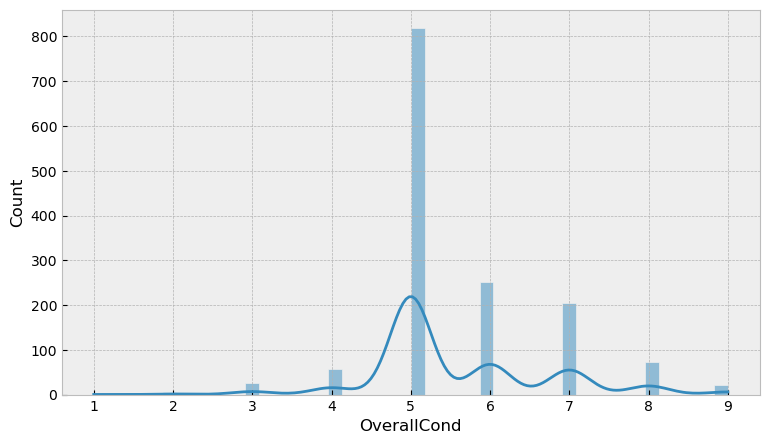

In [21]:
#Let's see the distribution of the houses according to their overall condition
plt.style.use('bmh')
plt.figure(figsize=(9,5))
sns.histplot(new_data["OverallCond"],kde=True)
plt.show()

# Observations:

- most of the houses that are up for sale are in above average good condition
- only a few are in a terribly bad condition

In [24]:
new_data.columns

Index(['SalePrice', 'Functional', 'BedroomAbvGr', 'MiscVal', 'HeatingQC',
       'SaleCondition', 'Utilities', 'OverallCond', 'BldgType', 'MSSubClass',
       'MSZoning', 'OverallQual', 'YrSold', 'YearBuilt', 'Neighborhood',
       'SaleType'],
      dtype='object')

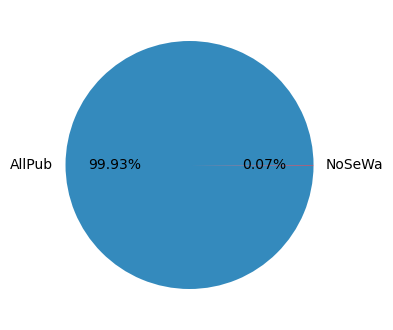

In [22]:
#univariate analysis of utilities 

fig,ax = plt.subplots(figsize=(4,6))
count = Counter(new_data["Utilities"])

ax.pie(count.values(), labels=count.keys(), autopct = lambda p: f"{p:.2f}%")
plt.show()

- It can  be seen from the above pieplot that almost all the houses available for sale have all public utilities including electricity, water, gas and septic tank


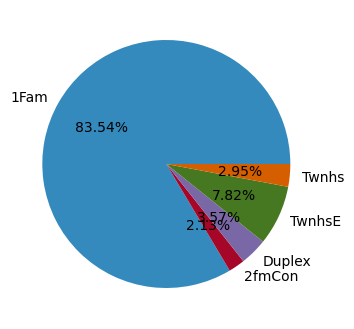

In [23]:
#How many building type are up for sales? 

fig,ax = plt.subplots(figsize=(4,8))
count = Counter(new_data["BldgType"])

ax.pie(count.values(), labels=count.keys(), autopct = lambda p: f"{p:.2f}%")
plt.show()

# Observations
- it is observed from the pieplot above that most of the houses that are available for sale are Single-Family detached flats followed by Town-House-End unit and the Duplexes

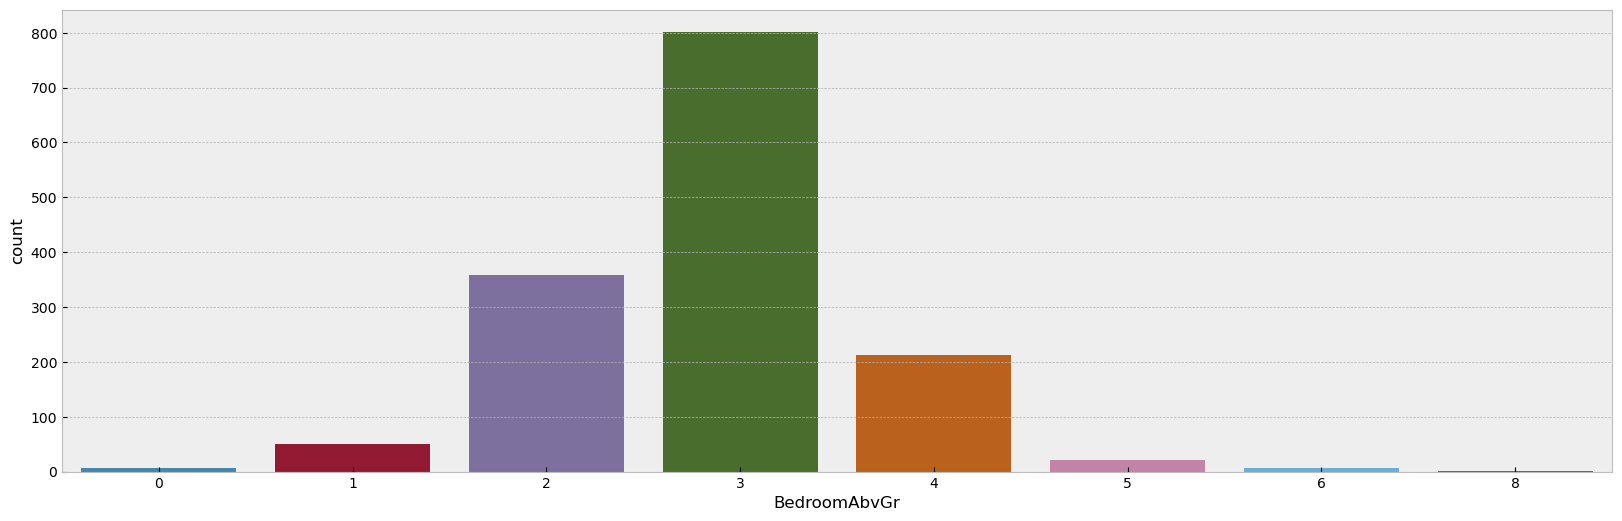

In [24]:
#univariate distribution of the Bedrooms

plt.figure(figsize=(20,6))
sns.countplot(x="BedroomAbvGr",data=new_data)
plt.show()

# observations
- Most of the houses are 3-bedrooms and 2 bedrooms while a good number of them are 4 bedrooms.
- Moreover, a number of them are identified as 0 bedroom, this can be treated as missing value of a sort and replaced with NAN or all together ignored

In [91]:
new_data

Index(['SalePrice', 'Functional', 'BedroomAbvGr', 'MiscVal', 'HeatingQC',
       'SaleCondition', 'Utilities', 'OverallCond', 'BldgType', 'MSSubClass',
       'MSZoning', 'OverallQual', 'YrSold', 'YearBuilt', 'Neighborhood',
       'SaleType'],
      dtype='object')

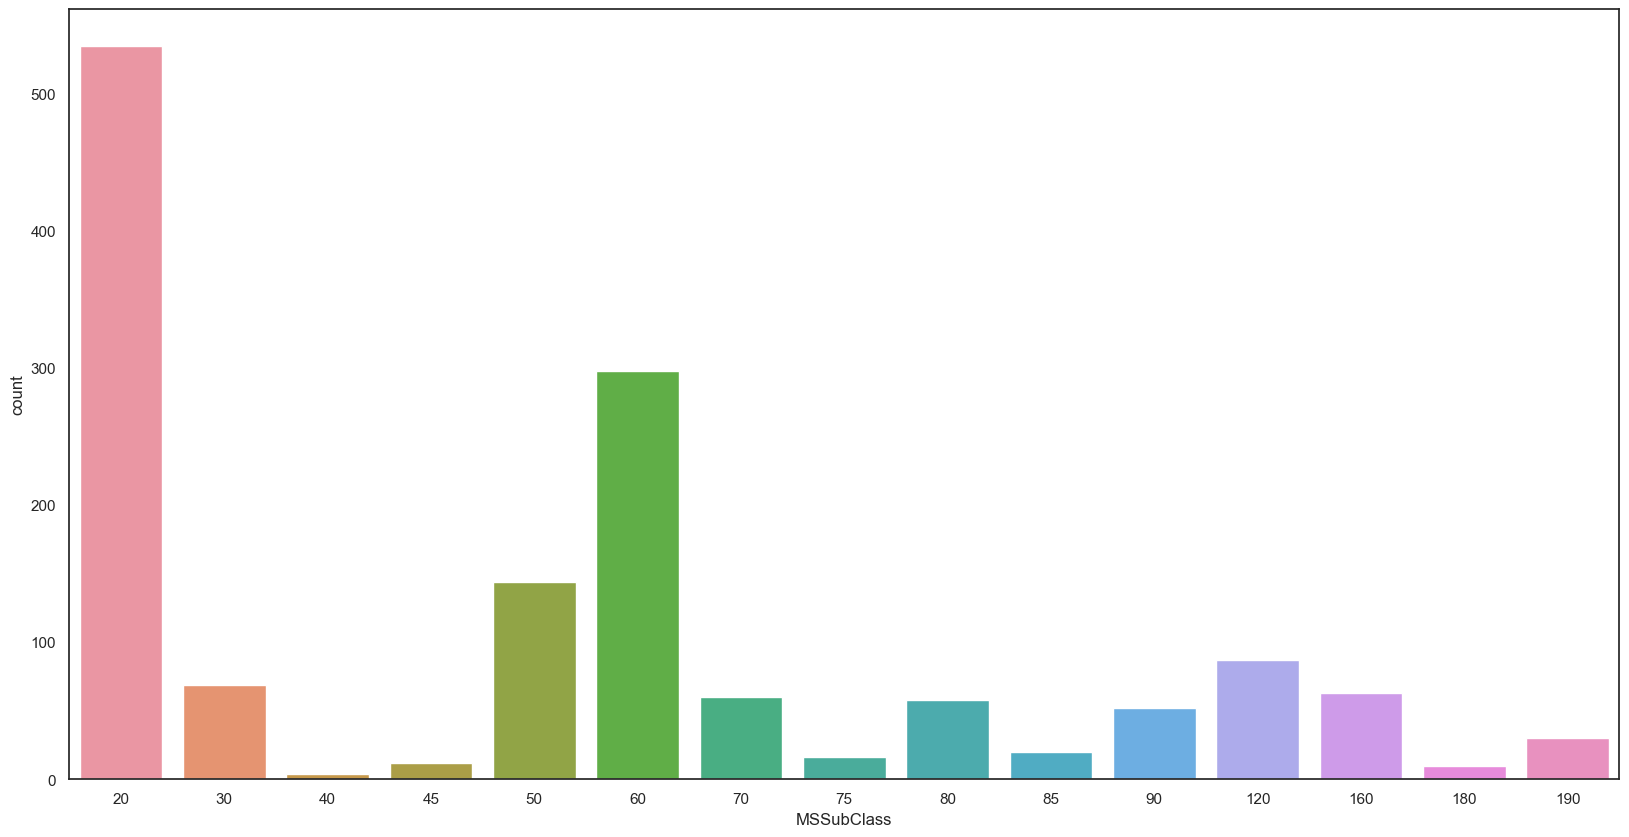

In [25]:
#univariate distribution of the housing style involved in the sales

sns.set_theme(style="white")
plt.figure(figsize=(20,10))
sns.countplot(x="MSSubClass",data=new_data)
plt.show()

# Observations:
- A large number of the houses are 1-STORY 1946 & NEWER ALL STYLES, 2-STORY 1946 & NEWER and 1-1/2 STORY FINISHED ALL AGES
- Others are that are most available are 1-STORY PUD (Planned Unit Development) - 1946 & NEWER, 2-STORY PUD - 1946 & NEWER and 2-1/2 STORY ALL AGES
- The least available house style is the 1-STORY W/FINISHED ATTIC ALL AGES

### Bivariate analysis

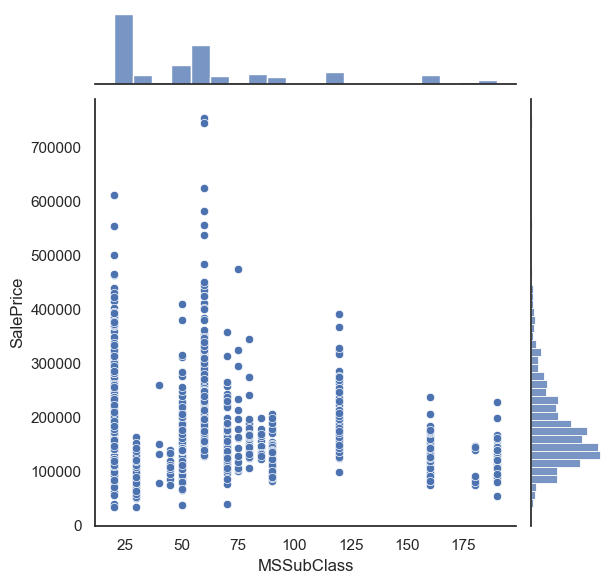

In [26]:
#realtionship/ correltaions/interactions between two variables
sns.jointplot(x="MSSubClass", y="SalePrice", data=new_data)
plt.show()

# Observations:
- Regardless of the housing styles, the sale price of most of the houses fall below 300,000 USD 
- The outtrageous prices are on the 1-STORY 1946 & NEWER ALL STYLES and 2-STORY 1946 & NEWER
- There is no 2-STORY 1946 & NEWER style available whose sale price is below 110000 USD

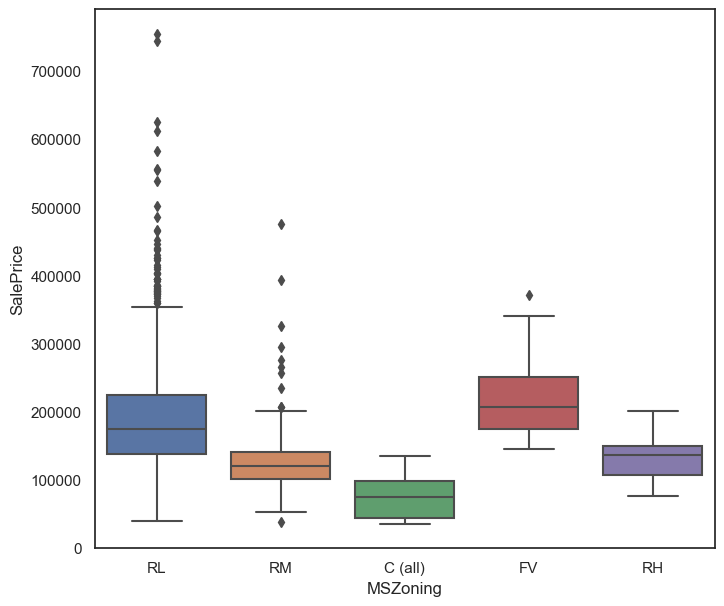

In [51]:
#relationship btw the sales price vs the housing zone
plt.figure(figsize=(8,7))
sns.boxplot(x="MSZoning",y="SalePrice",data=new_data)
plt.show()

# Observations:
- Houses in the Residential Low Density zone are most expensive followed by houses in floating villages
- while houses in the commercial zone are relatively the cheapest. 
- so much outliers or outrageous prices are on the houses  that are in the RL (Residential Low Density Zone) followed by those in RM (Residential Medium Zone)

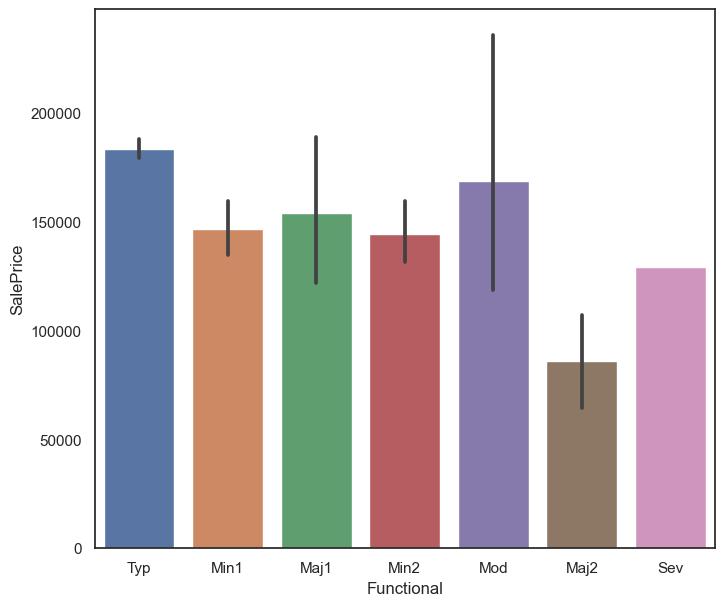

In [34]:
#relationship btw the sales price vs functionality
plt.figure(figsize=(8,7))
sns.barplot(x="Functional",y="SalePrice",data=new_data)
plt.show()

# Obseravation:
-houses that comes with major deductions 2 have least sale price while those that have typical functionality have highest sale price

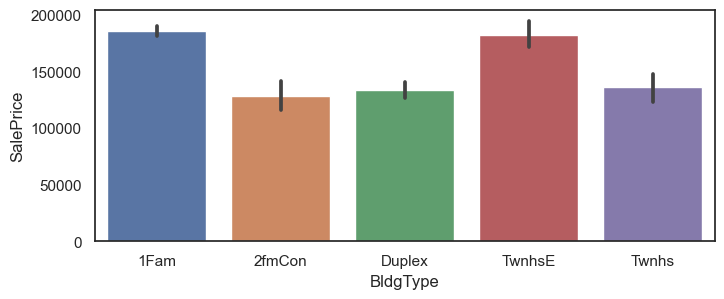

In [62]:
#Bivaariate btw the sales price vs the building type
plt.figure(figsize=(8,3))
sns.barplot(x="BldgType",y="SalePrice",data=new_data)
plt.show()

# Observation:
- The single family detached and town house end unit houses are the most expensive houses while the two family conversion houses are the least expensive and townhouse inside unit and the duplexes are on average price. 

In [44]:
new_data.columns

Index(['SalePrice', 'Functional', 'BedroomAbvGr', 'MiscVal', 'HeatingQC',
       'SaleCondition', 'Utilities', 'OverallCond', 'BldgType', 'MSSubClass',
       'MSZoning', 'OverallQual', 'YrSold', 'YearBuilt', 'Neighborhood',
       'SaleType'],
      dtype='object')

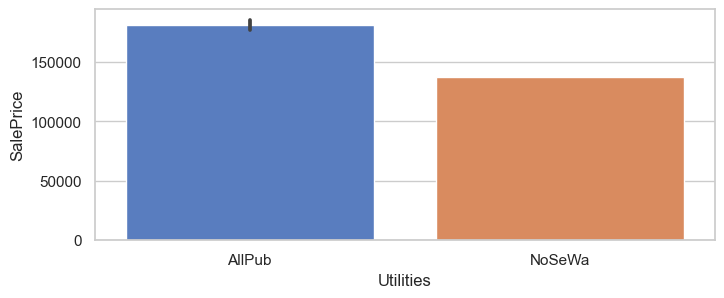

In [45]:
#Bivaariate btw the sales price vs Utilities
plt.figure(figsize=(8,3))
sns.barplot(x="Utilities", y="SalePrice",data=new_data)
plt.show()

- As expected, the sale price of houses that have all the utilities have higher than those with only Electricity and Gas

### Multivariate analysis

<Axes: >

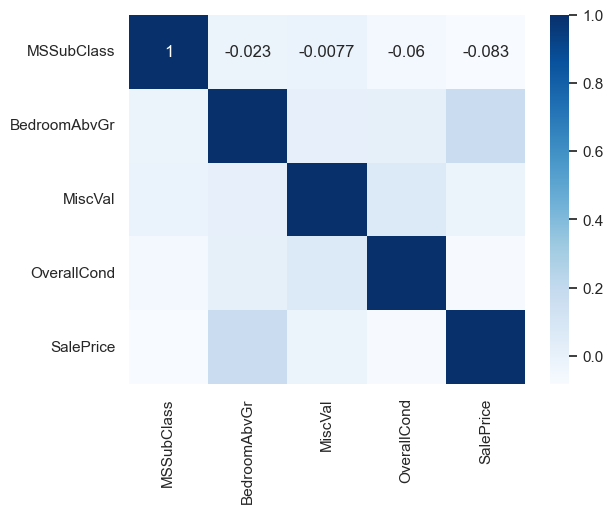

In [57]:
#multivariate analysis- correlation analysis
data = ["MSSubClass","BedroomAbvGr","MiscVal","OverallCond","SalePrice"]
corr = new_data[data].corr()
sns.heatmap(corr, cmap='Blues', annot=True)

# Observation:
- There is correlation between the SalePrice and the number of bedrooms and also the misceleanous value.
- the other features were not seen to have strong correlation with sale price. However, this does not mean they could not have contributed to the sale price. 'Correlation is not causation and vice versa'

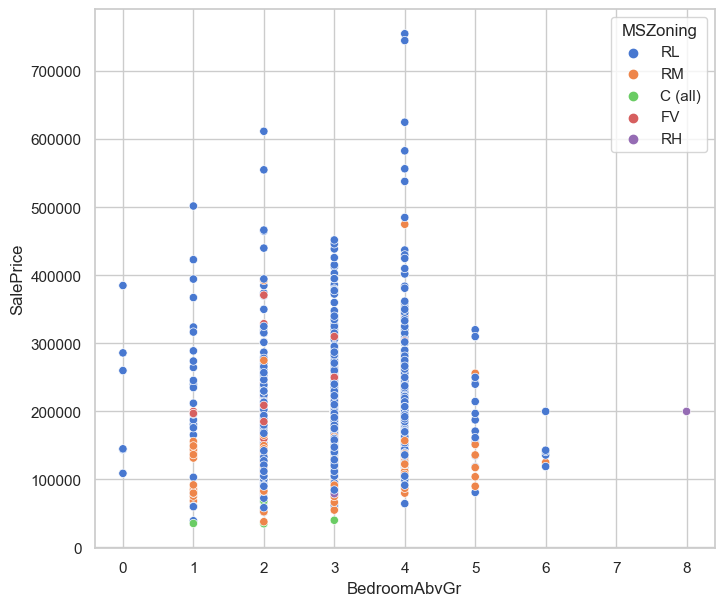

In [58]:
#relationship btw the sales price vs the housing zone
plt.figure(figsize=(8,7))
sns.scatterplot(x="BedroomAbvGr",y="SalePrice", hue='MSZoning', data=new_data)
plt.show()

# Observations:
- Most of the houses with outrageous sale price are the 4 bedroom in the Residential Low density zone 
- the singular 8 bedroom available for sale is in the Residential High density zone with the sale price of 200000 USD

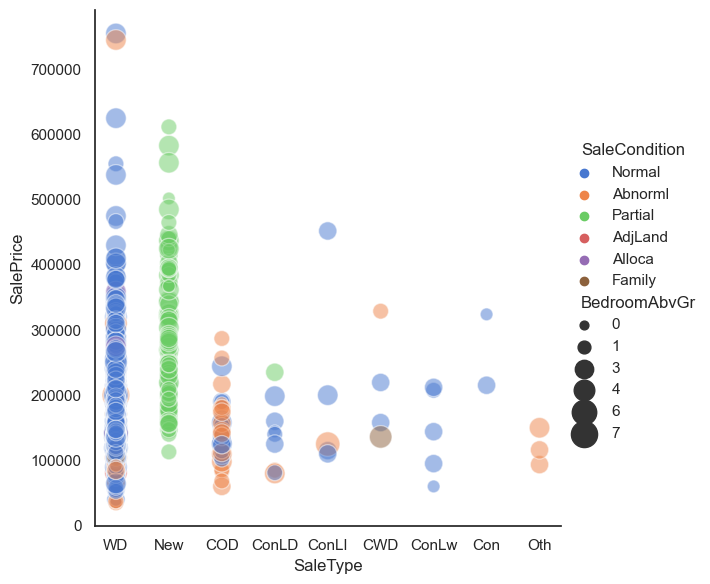

In [38]:
#multivariate analysis 
sns.set_theme(style='white')
sns.relplot(x="SaleType",y="SalePrice", hue="SaleCondition", size="BedroomAbvGr",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=new_data)
plt.show()

# Observations:
- most of the houses that are in normal sales condition are on conventional warranty deed followed by those in partial sale condition which are newly constructed homes. 
- A host of the houses that are in abnormal sale condition are on Court Officer Deed and most of them are within the range of 2 to 3 bedrooms

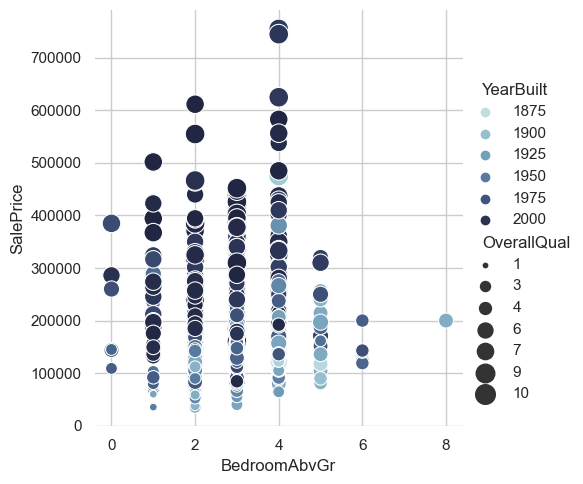

In [63]:
#Multivariable analysis- sale price and other independent variables
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=new_data,
    x="BedroomAbvGr", y="SalePrice",
    hue="YearBuilt", size="OverallQual",
    palette=cmap, sizes=(10, 200),
)
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)
plt.show()

# Observations:
- the bigger and the darker the circle the better the overall quality and the most recent the house.
- most of the houses in higher price echelon were built in 2000s having higher overall quality while those built between 1875 and late 90s are mostly within average in terms of the overall quality.
- It can be seen that the higher the overall quality of the houses, the higher the sale price.

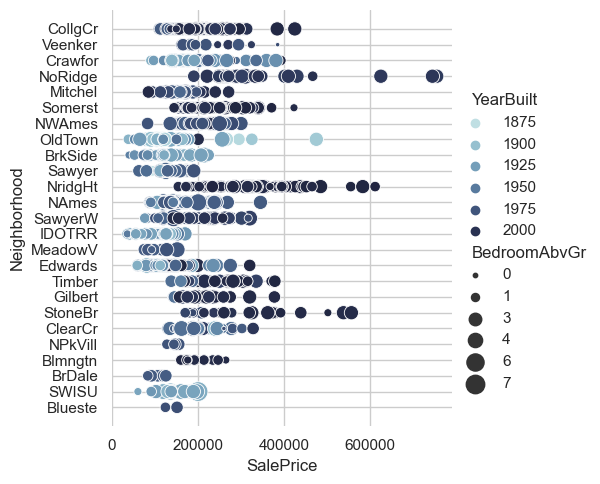

In [62]:
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=new_data,
    y="Neighborhood", x="SalePrice",
    hue="YearBuilt", size="BedroomAbvGr",
    palette=cmap, sizes=(10, 200),
)
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)
plt.show()

# Observations:
- Most of the recently built houses are in College Creek, Veenker, Mitchel, Somerst, North Ridge Heights, Gilbert, Bloomington
- the houses in Bloomington and Stone Brook are mostly 1-2 bedrooms while most of the houses in Old Town, South and West of Iowa State University are old and large houses. 
- it can be seen from here that the recently built houses have fewer number of bedrooms than the older houses.

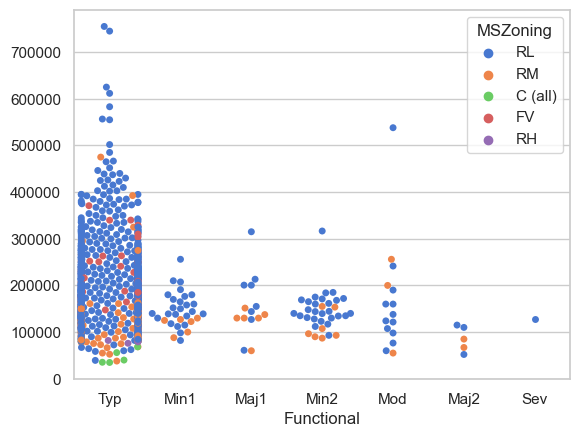

In [42]:
# Draw a categorical scatterplot to show each observation with respect to sale price
sns.set_theme(style="whitegrid", palette="muted" )

ax = sns.swarmplot(data=new_data, y="SalePrice", x="Functional", hue="MSZoning")
ax.set(ylabel="")
plt.show()

# Observation:
- Most of the houses have typical functionality and they are concentrated in the residential low density zone.
- Interestingly, all the houses in the floating villages are also typically functional.


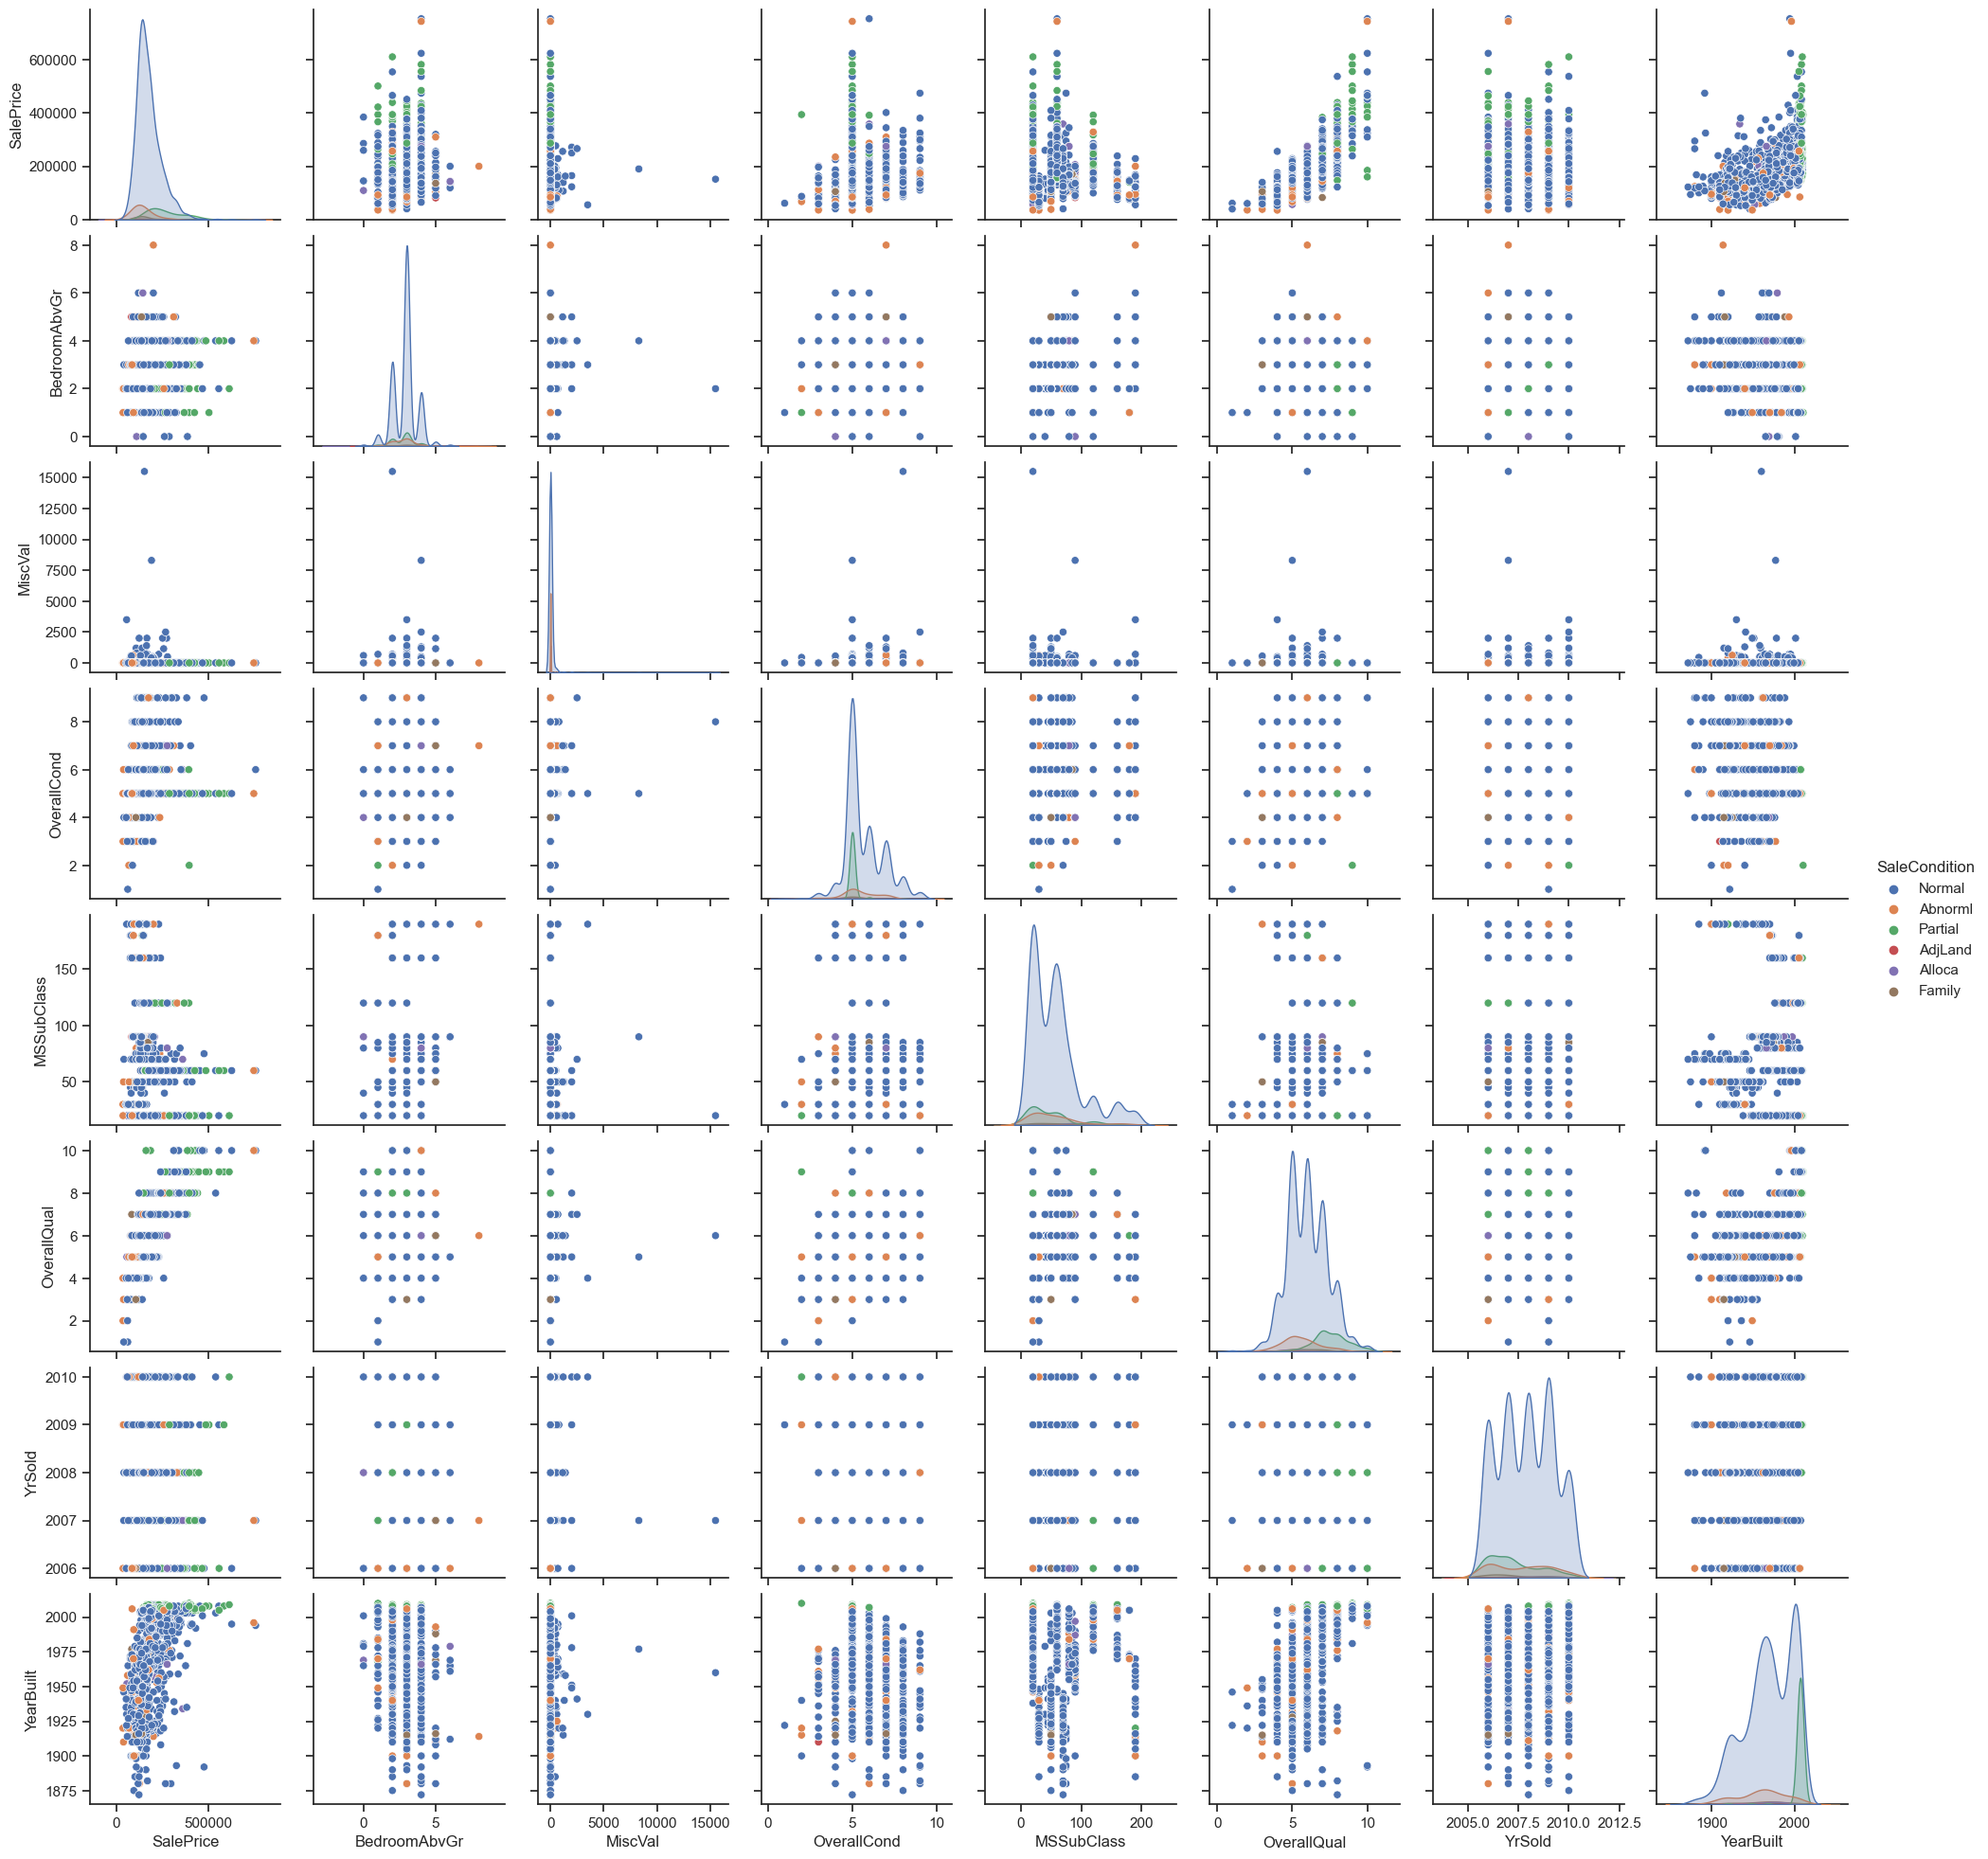

In [78]:
sns.set_theme(style="ticks")

sns.pairplot(new_data, hue="SaleCondition")
plt.show()


### Business Insights & Conclusions


- From the EDA carried out above, it is clear that the sale price of the houses is greatly influenced by the year a house was built, the number of above grade bedrooms, the zone located, the house style, the functionality of the house and the overall condition of the houses. 

- Houses in the Residential Low Density zone are most expensive followed by houses in floating villages while houses in the commercial zone are relatively the cheapest.

- prices are high on the houses that are in the RL (Residential Low Density Zone) followed by those in RM (Residential Medium Zone)

- most of the houses in higher price echelon were built in 2000s having higher overall quality while those built between 1875 and late 90s are mostly within average in terms of the overall quality.
- It was observed that the higher the overall quality of the houses, the higher the sale price.

- The single family detached and town house end unit houses are the most expensive houses while the two family conversion houses are the least expensive and townhouse inside unit and the duplexes are on average price.

- Most of the recently built houses are concentrated in these neighborhood; College Creek, Veenker, Mitchel, Somerst, North Ridge Heights, Gilbert, Bloomington while most of the houses in Old Town, South and West of Iowa State University are old and large houses. 

- For a higher return on investment, it is recommended that the company invest more in recently built 2-3 bedroom houses that are located in the Residential Low Density Zone in the neighborhood pointed out above. The overall condition of those houses are above average and they have typical functional.   

# The Next Project is to build a Machine Learning Model for the Price Prediction